# Cargar Imágenes

In [2]:
# crear dir
!mkdir images

In [3]:
# descomprimir zip
%cd images
!unzip animals_dataset.zip
%cd ..

/content/images
Archive:  animals_dataset.zip
   creating: animals_dataset/
   creating: animals_dataset/test/
   creating: animals_dataset/test/cat/
  inflating: animals_dataset/test/cat/images (1).jpeg  
  inflating: animals_dataset/test/cat/images (10).jpeg  
  inflating: animals_dataset/test/cat/images (11).jpeg  
  inflating: animals_dataset/test/cat/images (12).jpeg  
  inflating: animals_dataset/test/cat/images (13).jpeg  
  inflating: animals_dataset/test/cat/images (14).jpeg  
  inflating: animals_dataset/test/cat/images (15).jpeg  
  inflating: animals_dataset/test/cat/images (2).jpeg  
  inflating: animals_dataset/test/cat/images (3).jpeg  
  inflating: animals_dataset/test/cat/images (4).jpeg  
  inflating: animals_dataset/test/cat/images (5).jpeg  
  inflating: animals_dataset/test/cat/images (6).jpeg  
  inflating: animals_dataset/test/cat/images (7).jpeg  
  inflating: animals_dataset/test/cat/images (71).jpeg  
  inflating: animals_dataset/test/cat/images (8).jpeg  
  i

In [4]:
# eliminar zip
!rm -rf /content/images/animals_dataset.zip

## Exploración de imágenes

In [9]:
import os

In [10]:
# cantidad de imagenes en Train / Test / Val
dataset_path = "/content/images/animals_dataset"

# subcarpetas
splits = ["train", "validation", "test"]

for split in splits:
    split_path = os.path.join(dataset_path, split)
    print(f"\n Subcarpeta: {split.upper()}:")

    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            num_images = len([
                f for f in os.listdir(class_path)
                if os.path.isfile(os.path.join(class_path, f))
            ])
            print(f"  {class_name}: {num_images} imágenes")


 Subcarpeta: TRAIN:
  cow: 86 imágenes
  dog: 111 imágenes
  cat: 91 imágenes
  lion: 89 imágenes
  deep: 87 imágenes

 Subcarpeta: VALIDATION:
  cow: 15 imágenes
  dog: 17 imágenes
  cat: 17 imágenes
  lion: 17 imágenes
  deep: 17 imágenes

 Subcarpeta: TEST:
  cow: 16 imágenes
  dog: 16 imágenes
  cat: 17 imágenes
  lion: 17 imágenes
  deep: 16 imágenes


## Representación gráfica de los datos

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

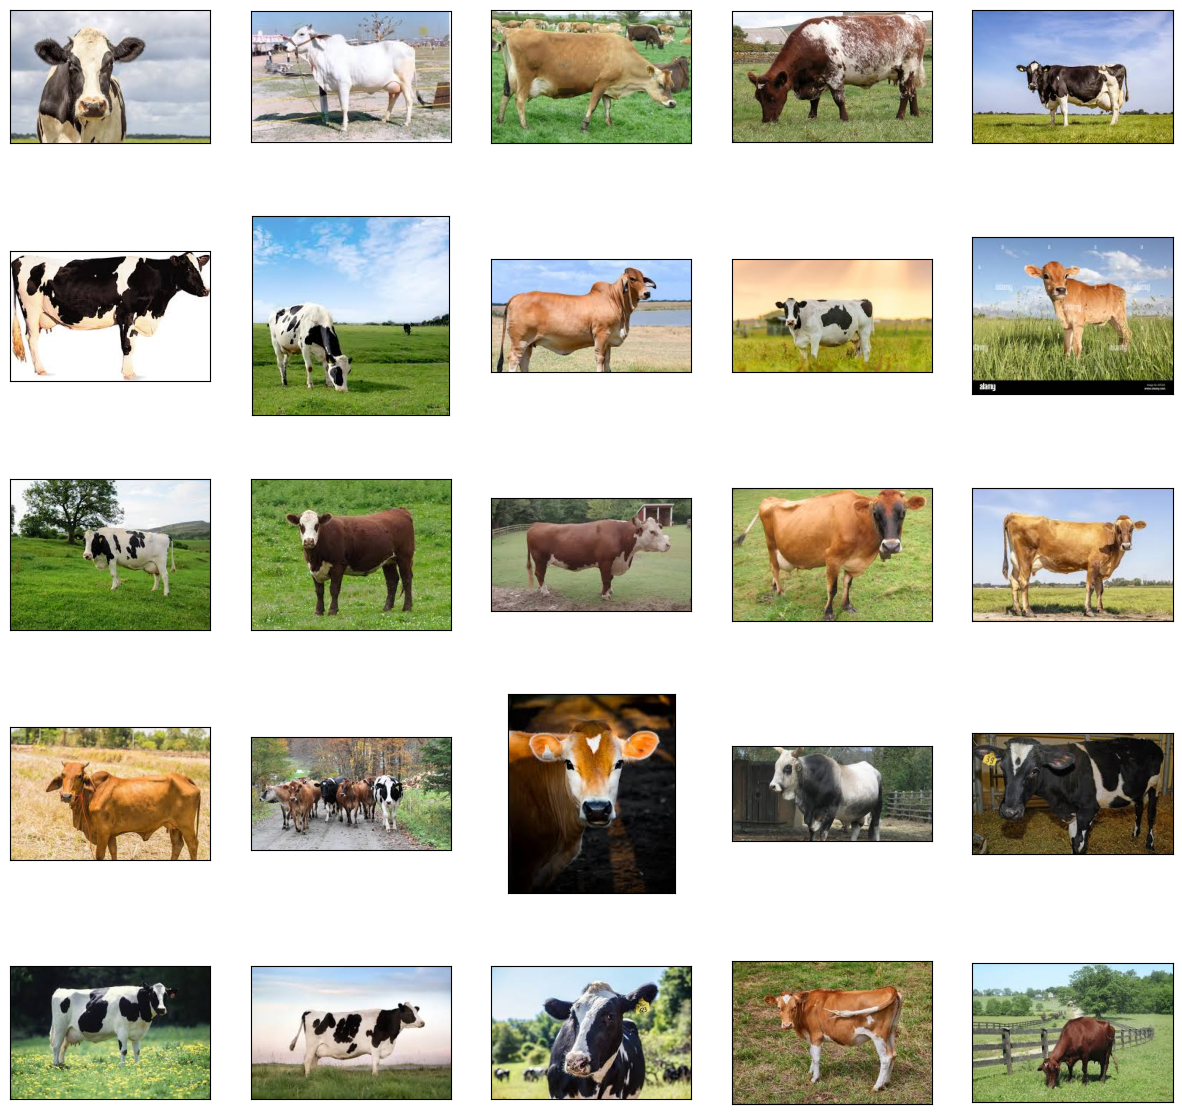

In [13]:
plt.figure(figsize=(15,15))

carpeta = '/content/images/animals_dataset/train/cow'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

# Preprocesar Imágenes

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array

In [16]:
dataset_train_dir = "images/animals_dataset/train"
dataset_test_dir = "images/animals_dataset/test"
dataset_val_dir = "images/animals_dataset/validation"

img_height, img_width = 150, 150
batch_size = 32
epochs = 100

In [18]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [19]:
train_generator = train_datagen.flow_from_directory(
    dataset_train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',   # multiclase
    shuffle=True
)

Found 464 images belonging to 5 classes.


In [20]:
val_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = val_datagen.flow_from_directory(
    dataset_val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 83 images belonging to 5 classes.


In [21]:
test_generator = val_datagen.flow_from_directory(
    dataset_test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 82 images belonging to 5 classes.


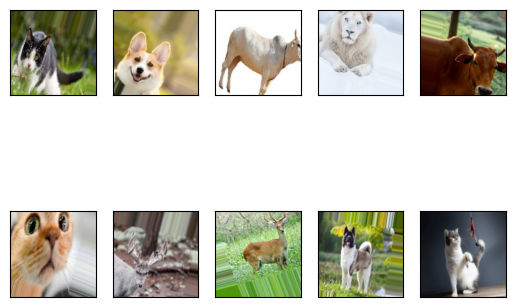

In [22]:
for imagen, etiqueta in train_generator:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

# Transferencia de Aprendizaje (MobileNetV2)

In [29]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, optimizers, models
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
num_classes = len(train_generator.class_indices)

In [31]:
base_model = MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet',
    pooling="avg"
)
base_model.trainable = False

/tmp/ipython-input-2882416593.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


In [32]:
# construir modelo propio
cnn = models.Sequential([
    base_model,
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # multiclase
])

cnn.compile(
    optimizer = optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = cnn.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.2136 - loss: 2.7035 - val_accuracy: 0.4217 - val_loss: 1.2937
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.3432 - loss: 1.8347 - val_accuracy: 0.7349 - val_loss: 0.8919
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - accuracy: 0.4707 - loss: 1.4613 - val_accuracy: 0.8072 - val_loss: 0.6526
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.5665 - loss: 1.2604 - val_accuracy: 0.8795 - val_loss: 0.5155
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - accuracy: 0.6337 - loss: 1.0487 - val_accuracy: 0.9036 - val_loss: 0.4457
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.6487 - loss: 0.9361 - val_accuracy: 0.8916 - val_loss: 0.3940
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.6832 - loss: 0.7667 - val_accuracy: 0.9157 - val_loss: 0.3483
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.7123 - loss: 0.7754 - val_accura

## Métricas del entrenamiento

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

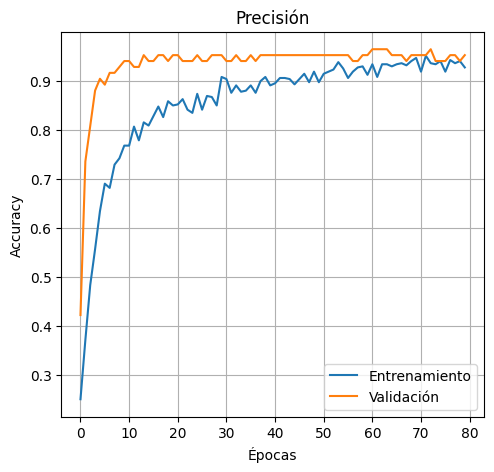

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

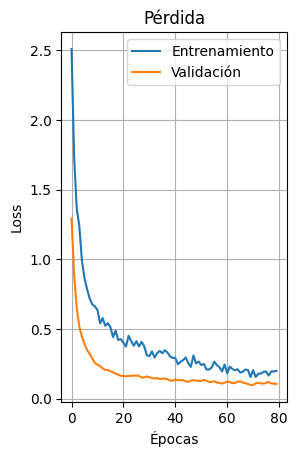

In [36]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

## Evaluar rendimiento del modelo

In [39]:
val_preds = cnn.predict(validation_generator)

val_preds_classes = np.argmax(val_preds, axis=1)

val_labels = validation_generator.classes

# Matriz de confusión y reporte
print(confusion_matrix(val_labels, val_preds_classes))
print(classification_report(
    val_labels,
    val_preds_classes,
    target_names=list(validation_generator.class_indices.keys())
))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[16  0  0  1  0]
 [ 0 14  0  0  1]
 [ 0  0 16  0  1]
 [ 0  0  0 17  0]
 [ 0  0  0  1 16]]
              precision    recall  f1-score   support

         cat       1.00      0.94      0.97        17
         cow       1.00      0.93      0.97        15
        deep       1.00      0.94      0.97        17
         dog       0.89      1.00      0.94        17
        lion       0.89      0.94      0.91        17

    accuracy                           0.95        83
   macro avg       0.96      0.95      0.95        83
weighted avg       0.96      0.95      0.95        83



In [40]:
score = cnn.evaluate(validation_generator)

print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9486 - loss: 0.1082
Test loss: 0.0986
Test accuracy: 0.9518


# Predicción de nuevas entradas

In [41]:
import requests
from io import BytesIO
from PIL import Image

In [42]:
def predict_image(image_path_or_url, modelo, class_indices):
    # cargar imagen desde url o desde archivo local
    if image_path_or_url.startswith('http'):
        response = requests.get(image_path_or_url)
        img = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        img = Image.open(image_path_or_url).convert('RGB')

    # preprocesar imagen como entrada del modelo
    img = img.resize((img_width, img_height))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # predecir
    probs = modelo.predict(img_array)[0]
    pred_class_index = np.argmax(probs)
    confidence = probs[pred_class_index]

    # mapear índice a nombre de clase
    class_labels = list(class_indices.keys())
    label = class_labels[pred_class_index]

    plt.imshow(img)
    plt.title(f"Predicción: {label} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

    return label, confidence

In [58]:
indices = validation_generator.class_indices

indices

{'cat': 0, 'cow': 1, 'deep': 2, 'dog': 3, 'lion': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


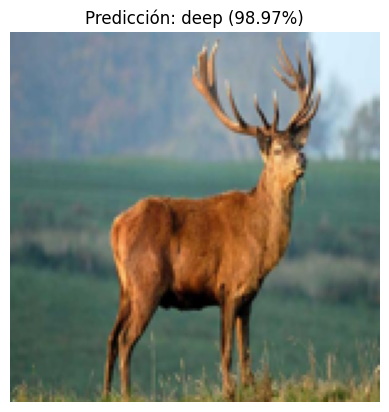

('deep', np.float32(0.9897027))

In [47]:
predict_image(
    'https://cdn0.bioenciclopedia.com/es/posts/5/2/0/ciervo_25_600.jpg',
    cnn,
    indices
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


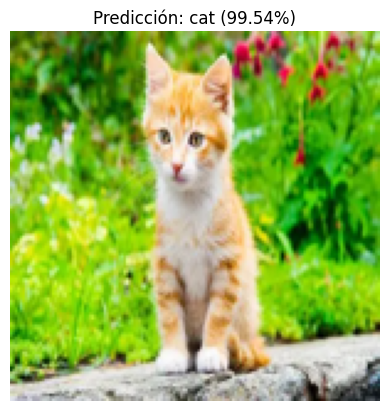

('cat', np.float32(0.99538475))

In [48]:
predict_image(
    'https://tse2.mm.bing.net/th/id/OIP.CnSwKQMTmk0TozvHWmRdeQHaE8?rs=1&pid=ImgDetMain&o=7&rm=3',
    cnn,
    indices
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


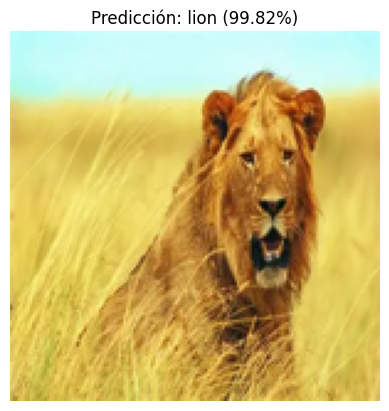

('lion', np.float32(0.9981844))

In [49]:
predict_image(
    'https://tse4.mm.bing.net/th/id/OIP.76LpbX6IgI0Lshnt9MRsowHaEo?rs=1&pid=ImgDetMain&o=7&rm=3',
    cnn,
    indices
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


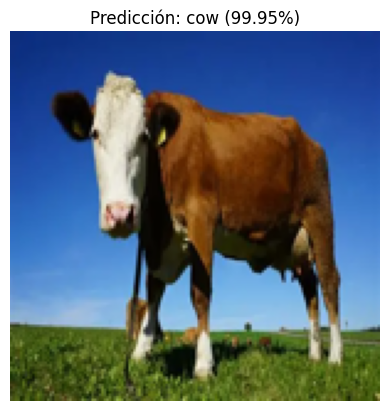

('cow', np.float32(0.9995067))

In [50]:
predict_image(
    'https://tse1.mm.bing.net/th/id/OIP.oab5aTYuG69fNPmfdcHQzAHaE8?rs=1&pid=ImgDetMain&o=7&rm=3',
    cnn,
    indices
)

## Entradas con ruido

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


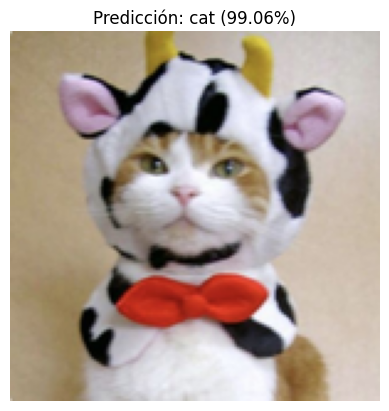

('cat', np.float32(0.9906259))

In [51]:
predict_image(
    'https://i.pinimg.com/originals/d2/08/af/d208af1aa3fe399e7f91b5423caefc0e.jpg',
    cnn,
    indices
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


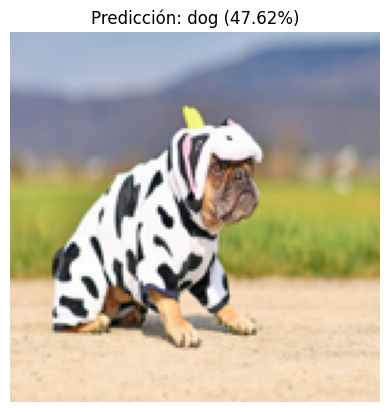

('dog', np.float32(0.47623137))

In [53]:
predict_image(
    'https://media.istockphoto.com/photos/french-bulldog-dog-wearing-a-funny-halloween-cow-costume-picture-id1324066246?k=20&m=1324066246&s=612x612&w=0&h=5R6O5BetMfWmutYK7scC2yfWBYYr9RanV0Ezt6FAhpo=',
    cnn,
    indices
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


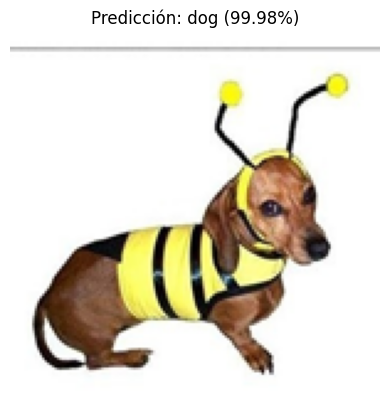

('dog', np.float32(0.99981225))

In [54]:
predict_image(
    'https://http2.mlstatic.com/D_NQ_NP_629394-MLM31923495047_082019-W.jpg',
    cnn,
    indices
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


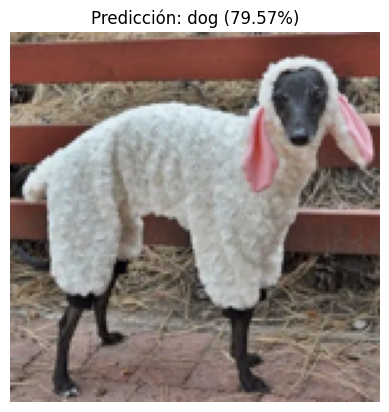

('dog', np.float32(0.7957237))

In [55]:
predict_image(
    'https://tse1.mm.bing.net/th/id/OIP.hDinl-IVoepwFmlh4A0mcQHaHh?rs=1&pid=ImgDetMain&o=7&rm=3',
    cnn,
    indices
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


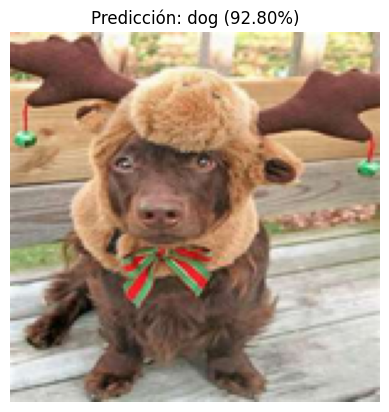

('dog', np.float32(0.9279921))

In [56]:
predict_image(
    'https://www.fun-stuff-to-do.com/images/my-funny-dear-or-deer-dog-santas-got-a-new-reindeer-21464584.jpg',
    cnn,
    indices
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


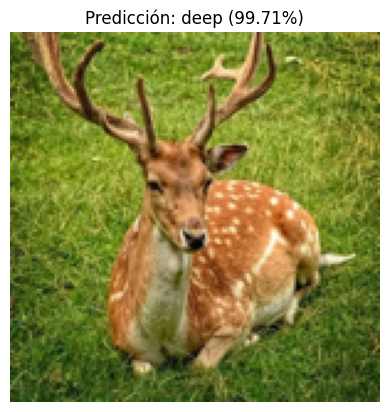

('deep', np.float32(0.9970879))

In [57]:
predict_image(
    'https://tse3.mm.bing.net/th/id/OIP.P14H-Zp5y6FUXbJqDtcpkgHaGS?rs=1&pid=ImgDetMain&o=7&rm=3',
    cnn,
    indices
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


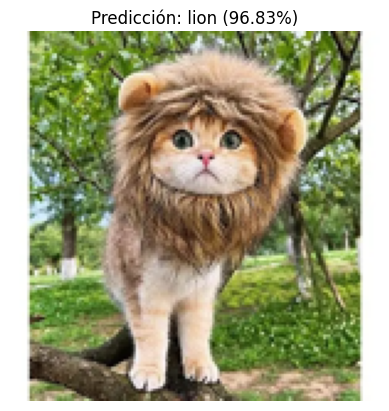

('lion', np.float32(0.9683432))

In [59]:
predict_image(
    'https://tse1.mm.bing.net/th/id/OIP.DPqUuwJaJsN-eyDmIMff1AHaHa?rs=1&pid=ImgDetMain&o=7&rm=3',
    cnn,
    indices
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


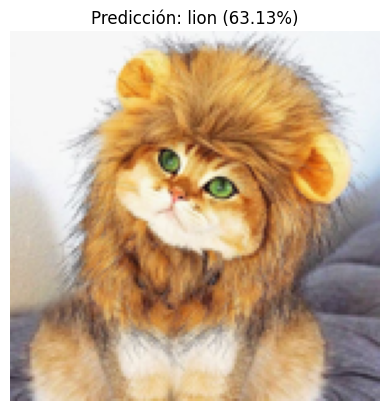

('lion', np.float32(0.6313102))

In [60]:
predict_image(
    'https://i.pinimg.com/736x/be/bf/0a/bebf0a790f0a3f7a465878b2215b97ea.jpg',
    cnn,
    indices
)